# Data Science (Basic)

### Phase 1

In [1]:
# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing sample data
data = pd.read_csv("sample_dataset.csv")
display(data)

,Study Hours,Attendance,Books Read,Playtime,Exam Scores
0,5.0,90.0,4.0,1.0,75
1,7.5,85.0,3.0,-2.0,92
2,3.0,70.0,2.0,3.0,60
3,6.0,NaN,1.0,0.5,85
4,4.5,80.0,4.0,3.5,68
5,8.0,92.0,5.0,2.0,95
6,2.5,75.0,NaN,1.5,50
7,-1.5,88.0,2.0,1.0,78
8,7.0,89.0,2.0,2.0,90
9,4.0,78.0,3.0,2.5,70


There are discrepancies in the dataset. There are negative time values under 'Study Hours' and 'Playtime' columns. NAN values also exist, all of which are dealt separately depending on datatype.

In [3]:
# Data Cleaning

cleaned_data = data.copy()

# Removing negative invalid time values
cleaned_data['Study Hours'] = abs(data['Study Hours']) 
cleaned_data['Playtime'] = abs(data['Playtime'])

# Filling NAN values
cleaned_data['Attendance'].fillna(value=cleaned_data['Attendance'].mean(),inplace=True)
cleaned_data['Books Read'].fillna(value=cleaned_data['Books Read'].median(),inplace=True)
display(cleaned_data)

,Study Hours,Attendance,Books Read,Playtime,Exam Scores
0,5.0,90.0,4.0,1.0,75
1,7.5,85.0,3.0,2.0,92
2,3.0,70.0,2.0,3.0,60
3,6.0,83.0,1.0,0.5,85
4,4.5,80.0,4.0,3.5,68
5,8.0,92.0,5.0,2.0,95
6,2.5,75.0,3.0,1.5,50
7,1.5,88.0,2.0,1.0,78
8,7.0,89.0,2.0,2.0,90
9,4.0,78.0,3.0,2.5,70


Now, after the data has been cleaned, let's pick out two most essential features that share strong correlation with 'Exam Scores'

In [4]:
# Finding Strongly correlated features with respect to Exam Scores
cleaned_data.corr()

,Study Hours,Attendance,Books Read,Playtime,Exam Scores
Study Hours,1.000000,0.554720,0.289949,-0.005370,0.804915
Attendance,0.554720,1.000000,0.310882,-0.463472,0.804827
Books Read,0.289949,0.310882,1.000000,0.336799,0.071613
Playtime,-0.005370,-0.463472,0.336799,1.000000,-0.260767
Exam Scores,0.804915,0.804827,0.071613,-0.260767,1.000000


As you can see, 'Study Hours' and 'Attendance' are the two highest correlated features which could be used for predicting 'Exam Scores' given a student record of just 'Attendance' and 'Study Hours' 

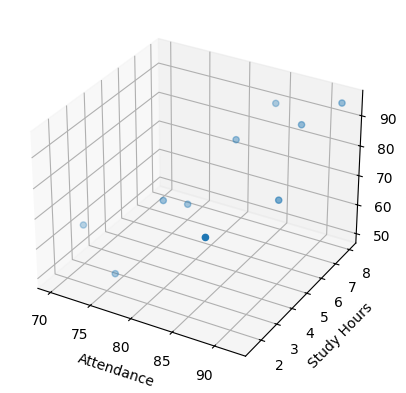

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x = cleaned_data['Attendance']
y = cleaned_data['Study Hours']
z = cleaned_data['Exam Scores']
ax.set_xlabel('Attendance')
ax.set_ylabel('Study Hours')
ax.set_zlabel('Exam Scores')
plt.show(ax.scatter3D(x,y,z))

A 3D plot visualizing the data points

### Phase 2

In [6]:
# Importing python libraries
from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import LeaveOneOut

In [7]:
# Multiple Linear Regression
X = cleaned_data[['Attendance','Study Hours']]
Y = cleaned_data['Exam Scores']

regr = LinearRegression(fit_intercept=True)
regr.fit(X, Y)
print(f'Line Intercept: {regr.intercept_},\nLine Coefficients [Attendance, Study Hours]: {regr.coef_}')

Line Intercept: -28.332160560651758,
Line Coefficients [Attendance, Study Hours]: [1.05793829 3.43332289]


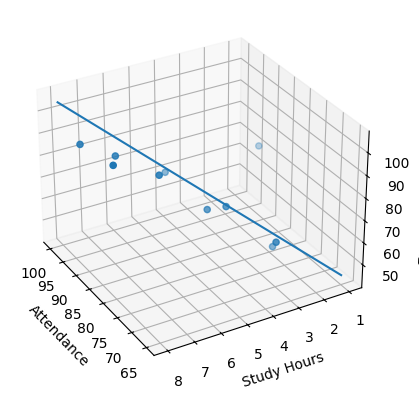

In [8]:
p = np.array(range(65,105,5))
q = np.array(range(1,9))
r = p*regr.coef_[0] + q*regr.coef_[1] +regr.intercept_

fig = plt.figure()
ax = plt.axes(projection='3d')
z = cleaned_data['Exam Scores']
y = cleaned_data['Study Hours']
x = cleaned_data['Attendance']
ax.set_xlabel('Attendance')
ax.set_ylabel('Study Hours')
ax.set_zlabel('Exam Scores')
ax.scatter3D(x,y,z)
# Change the following angles (in deg) and run again to view line from different orientations 
ax.view_init(30,150) # Elevation = 20, Rotation = 150
plt.show(ax.plot3D(p,q,r))

Fitting a line to the data points which can be used for prediction